In [ ]:
# !unzip /network/tmp1/cosnegau/dataset_cosnegau.zip -d /network/tmp1/cosnegau/
# ! rm -rf /network/tmp1/cosnegau/Dataset
# !ls /network/tmp1/cosnegau/

**Change the path to the temporary folder it is stored**

In [ ]:
# import string
# path = "/network/tmp1/cosnegau/Dataset/"
# list_sub_path=["both_road_test", "both_road_train", "off_road_test","off_road_train","on_road_test","on_road_train"]

# for sub_path in list_sub_path:
#     full_path = path+sub_path+".txt"
#     s = open(full_path).read()
#     s = s.replace('..', '/network/tmp1/cosnegau')
#     f = open(full_path, 'w')
#     f.write(s)
#     f.close()

**Import Segmented data**

In [40]:
import os
list_path = os.listdir('/network/home/cosnegau/anotated_dataset/')
# !rm /network/home/cosnegau/anotated_dataset/test*

rm: cannot remove '/network/home/cosnegau/anotated_dataset/test*': No such file or directory


In [41]:
# !mkdir /network/home/cosnegau/anotated_dataset/water_seg

In [25]:
# import the necessary packages
from __future__ import print_function
import numpy as np
import cv2
from IPython.display import Image
import imageio
from PIL import Image
import scipy.misc
from IPython.display import Image
# load the image


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


In [55]:
for path in list_path:
    if path[-4:]=='.png':
        #     original_image = cv2.imread('/network/home/cosnegau/anotated_dataset/cju8obdjc0ly00818pfwvrcpt.jpg')
        res = cv2.imread('/network/home/cosnegau/anotated_dataset/'+path)
        res= res[:,:,1].reshape(res.shape[0],res.shape[1],1)

        res_water = res[:,:,0]==2
        new_mask_water= np.zeros((res_water.shape[0],res_water.shape[1]))
        new_mask_water[res_water]=255
        imageio.imsave('/network/home/cosnegau/anotated_dataset/water_seg/'+path,new_mask_water)

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


In [1]:
#  /network/home/cosnegau/anotated_dataset/cju8obdjc0ly00818pfwvrcpt.jpg
import numpy as np
import matplotlib.patches as mpatches

def create_cityscapes_label_colormap():
    """Creates a label colormap used in CITYSCAPES segmentation benchmark.
    Returns:
    A colormap for visualizing segmentation results.
    """
    colormap = np.zeros((256, 3), dtype=np.uint8)
    colormap[0] = [128, 64, 128]
    colormap[1] = [244, 35, 232]
    colormap[2] = [70, 70, 70]
    colormap[3] = [102, 102, 156]
    colormap[4] = [190, 153, 153]
    colormap[5] = [153, 153, 153]
    colormap[6] = [250, 170, 30]
    colormap[7] = [220, 220, 0]
    colormap[8] = [107, 142, 35]
    colormap[9] = [152, 251, 152]
    colormap[10] = [70, 130, 180]
    colormap[11] = [220, 20, 60]
    colormap[12] = [255, 0, 0]
    colormap[13] = [0, 0, 142]
    colormap[14] = [0, 0, 70]
    colormap[15] = [0, 60, 100]
    colormap[16] = [0, 80, 100]
    colormap[17] = [0, 0, 230]
    colormap[18] = [119, 11, 32]
    return colormap

LABEL_NAMES =[
    'road', 'sidewalk', 'building', 'water', 'fence', 'pole', 'traffic light',
    'traffic sign', 'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 'truck',
    'bus', 'train', 'motorcycle', 'bicycle'
]


colormap = create_cityscapes_label_colormap()
all_patches = [mpatches.Patch(color = [colormap[ind_color][0]/255,colormap[ind_color][1]/255,colormap[ind_color][2]/255], label = LABEL_NAMES[ind_color]) for ind_color in range(19)]

patches =[]
for p in range(19):
    mask = np.array(res==p)
    if len(np.where(mask)[0])>2000: 
        patches.append(all_patches[p])
    color_mask = colormap[p]
    mask = np.dot(mask,np.array([[color_mask[0], color_mask[1], color_mask[2], 45]]))
    mask=scipy.misc.toimage(mask,mode="RGBA")
    if p==0:
        street_im = scipy.misc.toimage(original_image)
    street_im.paste(mask,box=None,mask=mask)
imageio.imsave('/network/home/cosnegau/anotated_dataset/test_cju8obdjc0ly00818pfwvrcpt.png',street_im)

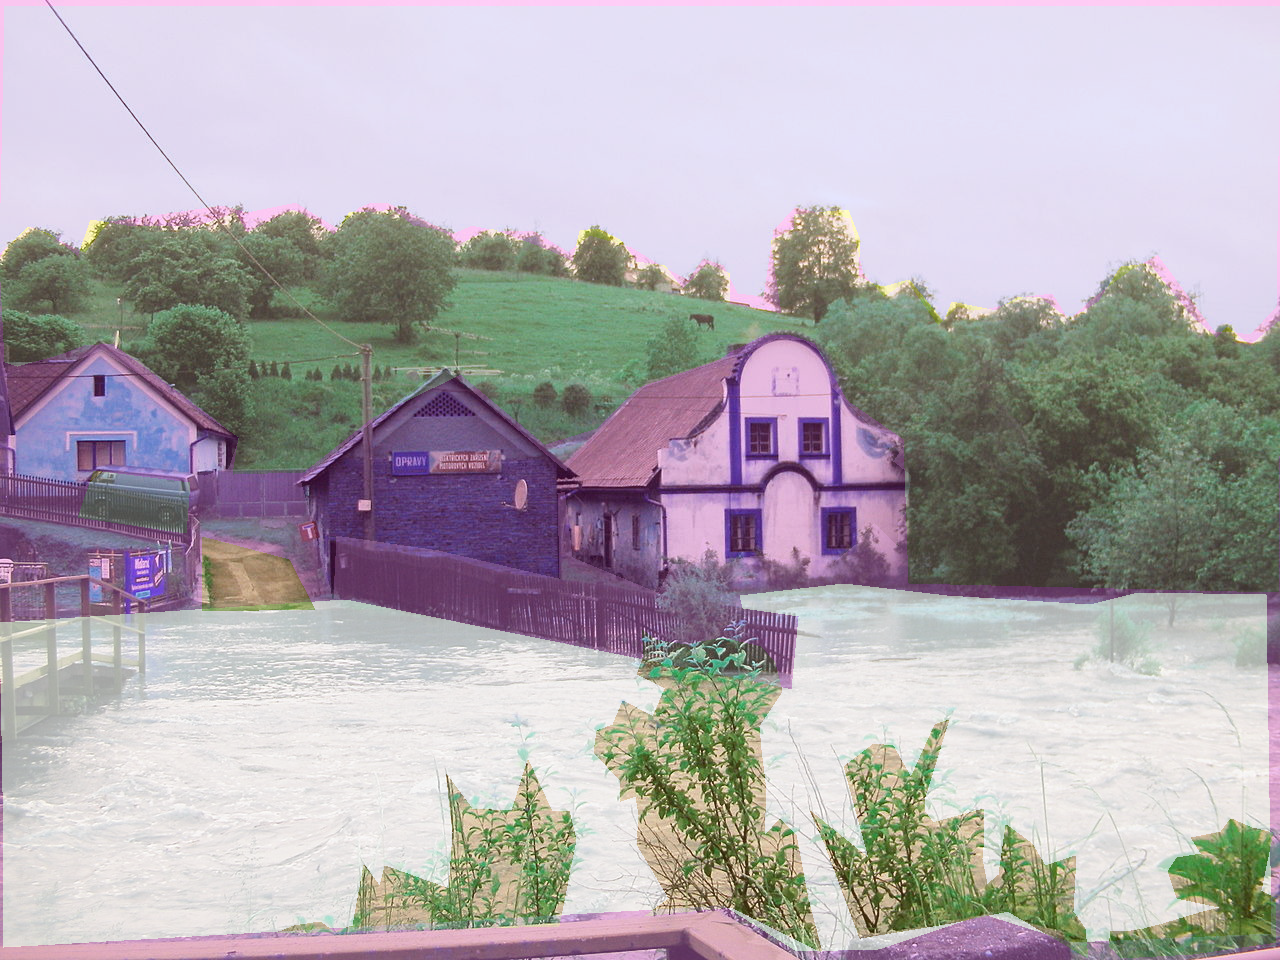

In [30]:
Image(filename = '/network/home/cosnegau/anotated_dataset/test_cju8obdjc0ly00818pfwvrcpt.png')

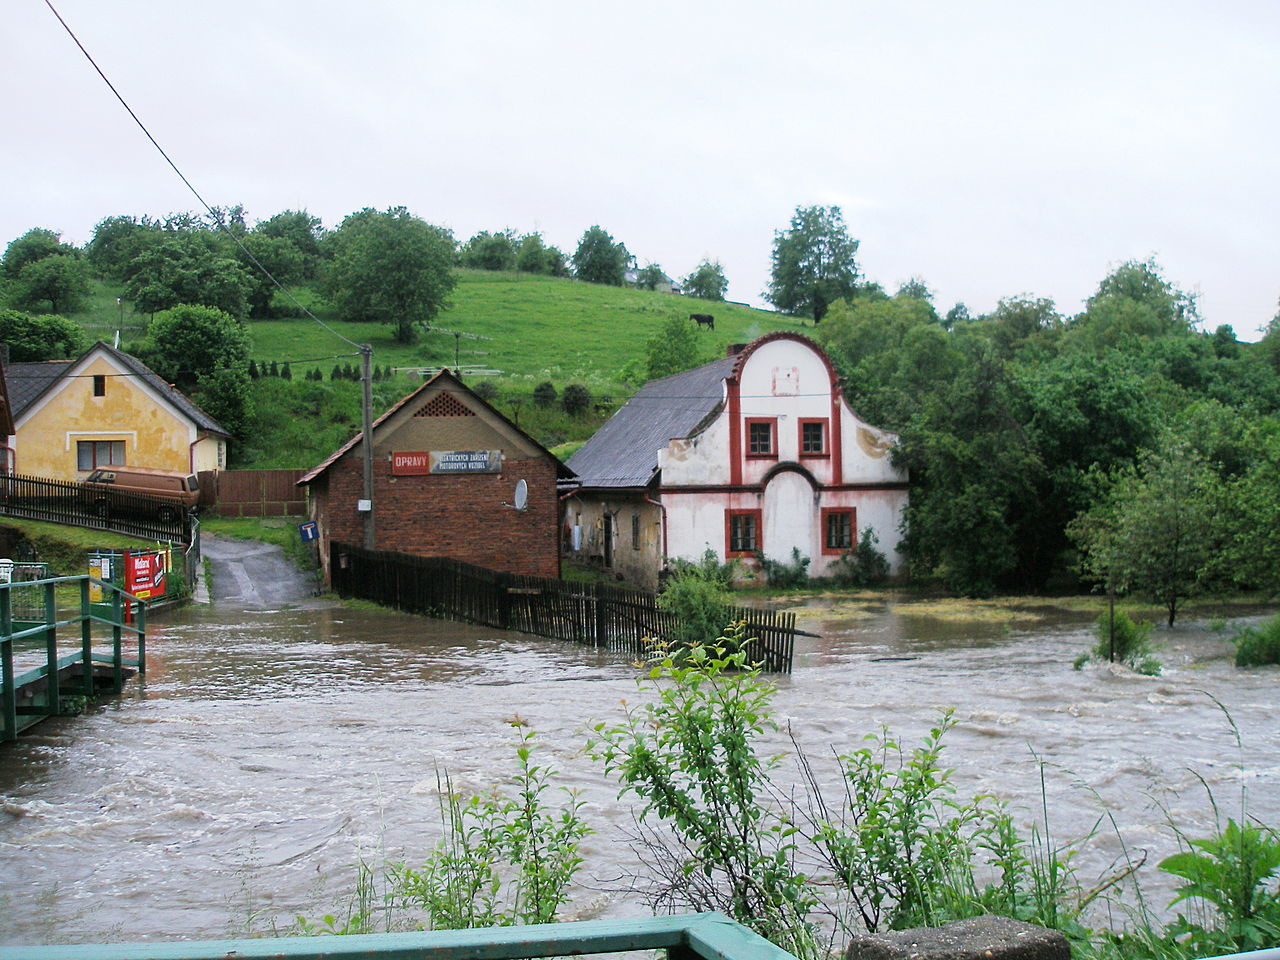

In [7]:
Image(filename = '/network/home/cosnegau/anotated_dataset/cju8obdjc0ly00818pfwvrcpt.jpg')

**Actual Code**

In [ ]:
# !pip2 install --no-cache-dir tensorflow-gpu

In [ ]:
# !pip install scipy
# !pip install scikit-image

In [ ]:
from __future__ import print_function
import tensorflow as tf

In [ ]:
import numpy as np
import TensorflowUtils as utils
import datetime
from six.moves import xrange
import glob
from skimage import io, transform, color
import glob
import os
import time

In [ ]:
FLAGS = tf.flags.FLAGS
tf.flags.DEFINE_integer("batch_size", "1", "batch size for training")
tf.flags.DEFINE_string("logs_dir", "/network/tmp1/cosnegau/models/", "path to logs directory")
tf.flags.DEFINE_string("data_dir", "/network/tmp1/cosnegau/Dataset/", "path to dataset")
tf.flags.DEFINE_string("output_dir", "/network/tmp1/cosnegau/results/", "path of output")
tf.flags.DEFINE_float("learning_rate", "1e-6", "Learning rate for Adam Optimizer")
tf.flags.DEFINE_bool('debug', "False", "Debug mode: True/ False")
tf.flags.DEFINE_string('mode', "train", "Mode train/ test/ visualize")

MAX_ITERATION = int(1e5 + 1)
NUM_OF_CLASSESS = 2
batch_offset = 0
IMAGE_SIZE_HEIGHT = 360
IMAGE_SIZE_WIDTH = 640

In [ ]:
def load_training_dataset_path():
    p = np.genfromtxt(FLAGS.data_dir+'on_road_train.txt',dtype='str')
    return p

def load_data(p, step):
    imgs=[]
    gt_imgs=[]
    gt_imgs2=[]
    for i in range(p.shape[0]):
        fp = p[i,0]
        fp_gt = p[i,1]
        #print("Loading images: %s \t %s"%(fp, fp_gt))

        img = io.imread(fp)
        img = img[:,0:1280,:]
        img = transform.resize(img, (IMAGE_SIZE_HEIGHT, IMAGE_SIZE_WIDTH))
        imgs.append(img)

        gt_img = io.imread(fp_gt)
        gt_img = transform.resize(gt_img, (IMAGE_SIZE_HEIGHT, IMAGE_SIZE_WIDTH))
    for r in range(gt_img.shape[0]):
        for c in range(gt_img.shape[1]):
            if gt_img[r,c] == 1:
                gt_img[r,c] = 1
    else:
        gt_img[r,c] = 0
        
    gt_imgs.append(gt_img)

    gt_img2 = io.imread(fp_gt)
    gt_img2 = transform.resize(gt_img2, (IMAGE_SIZE_HEIGHT, IMAGE_SIZE_WIDTH))
    for r in range(gt_img2.shape[0]):
        for c in range(gt_img2.shape[1]):
            if gt_img2[r,c] == 1:
                gt_img2[r,c] = 0
            else:
                gt_img2[r,c] = 1
    gt_imgs2.append(gt_img2)

    return np.asarray(imgs,np.float32), np.asarray(gt_imgs,np.int32), np.asarray(gt_imgs2, np.int32)

def load_test_data(p):
    imgs=[]
    im = p
    img = io.imread(im)
    #print('img.shape', img.shape)
    img = img[:,0:1280,:]
    img = transform.resize(img, (IMAGE_SIZE_HEIGHT, IMAGE_SIZE_WIDTH))
    imgs.append(img)
    return np.asarray(imgs, np.float32)

def inference(image, keep_prob):

    with tf.variable_scope("seg_inference"):
        W1_1 = utils.weight_variable([3, 3, 3, 64], name="W1_1")
        b1_1 = utils.bias_variable([64], name="b1_1")
        conv1_1 = utils.conv2d_basic(image, W1_1, b1_1)
        relu1_1 = tf.nn.relu(conv1_1, name="relu1_1")

        W1_2 = utils.weight_variable([3, 3, 64, 64], name="W1_2")
        b1_2 = utils.bias_variable([64], name="b1_2")
        conv1_2 = utils.conv2d_basic(relu1_1, W1_2, b1_2)
        relu1_2 = tf.nn.relu(conv1_2, name="relu1_2")

        ra_1, ra_1_small = utils.RA_unit(relu1_2, relu1_2.shape[1].value, relu1_2.shape[2].value, 16)
        W_s1 = utils.weight_variable([3, 3, 64*(1+16), 64], name="W_s1")
        b_s1 = utils.bias_variable([64], name="b_s1")
        conv_s1 = utils.conv2d_basic(ra_1, W_s1, b_s1)
        relu_s1 = tf.nn.relu(conv_s1, name="relu_s1")

        pool1 = utils.max_pool_2x2(relu_s1)

        W2_1 = utils.weight_variable([3, 3, 64, 128], name="W2_1")
        b2_1 = utils.bias_variable([128], name="b2_1")
        conv2_1 = utils.conv2d_basic(pool1, W2_1, b2_1)
        relu2_1 = tf.nn.relu(conv2_1, name="relu2_1")

        W2_2 = utils.weight_variable([3, 3, 128, 128], name="W2_2")
        b2_2 = utils.bias_variable([128], name="b2_2")
        conv2_2 = utils.conv2d_basic(relu2_1, W2_2, b2_2)
        relu2_2 = tf.nn.relu(conv2_2, name="relu2_2")

        ra_2, ra_2_small = utils.RA_unit(relu2_2, relu2_2.shape[1].value, relu2_2.shape[2].value, 16)
        W_s2 = utils.weight_variable([3, 3, 128*(1+16), 128], name="W_s2")
        b_s2 = utils.bias_variable([128], name="b_s2")
        conv_s2 = utils.conv2d_basic(ra_2, W_s2, b_s2)
        relu_s2 = tf.nn.relu(conv_s2, name="relu_s2")

        pool2 = utils.max_pool_2x2(relu_s2)

        W3_1 = utils.weight_variable([3, 3, 128, 256], name="W3_1")
        b3_1 = utils.bias_variable([256], name="b3_1")
        conv3_1 = utils.conv2d_basic(pool2, W3_1, b3_1)
        relu3_1 = tf.nn.relu(conv3_1, name="relu3_1")

        W3_2 = utils.weight_variable([3, 3, 256, 256], name="W3_2")
        b3_2 = utils.bias_variable([256], name="b3_2")
        conv3_2 = utils.conv2d_basic(relu3_1, W3_2, b3_2)
        relu3_2 = tf.nn.relu(conv3_2, name="relu3_2")

        W3_3 = utils.weight_variable([3, 3, 256, 256], name="W3_3")
        b3_3 = utils.bias_variable([256], name="b3_3")
        conv3_3 = utils.conv2d_basic(relu3_2, W3_3, b3_3)
        relu3_3 = tf.nn.relu(conv3_3, name="relu3_3")

        ra_3, ra_3_small = utils.RA_unit(relu3_3, relu3_3.shape[1].value, relu3_3.shape[2].value, 16)
        W_s3 = utils.weight_variable([3, 3, 256*(1+16), 256], name="W_s3")
        b_s3 = utils.bias_variable([256], name="b_s3")
        conv_s3 = utils.conv2d_basic(ra_3, W_s3, b_s3)
        relu_s3 = tf.nn.relu(conv_s3, name="relu_s3")

        pool3 = utils.max_pool_2x2(relu_s3)

        W4_1 = utils.weight_variable([3, 3, 256, 512], name="W4_1")
        b4_1 = utils.bias_variable([512], name="b4_1")
        conv4_1 = utils.conv2d_basic(pool3, W4_1, b4_1)
        relu4_1 = tf.nn.relu(conv4_1, name="relu4_1")

        W4_2 = utils.weight_variable([3, 3, 512, 512], name="W4_2")
        b4_2 = utils.bias_variable([512], name="b4_2")
        conv4_2 = utils.conv2d_basic(relu4_1, W4_2, b4_2)
        relu4_2 = tf.nn.relu(conv4_2, name="relu4_2")

        W4_3 = utils.weight_variable([3, 3, 512, 512], name="W4_3")
        b4_3 = utils.bias_variable([512], name="b4_3")
        conv4_3 = utils.conv2d_basic(relu4_2, W4_3, b4_3)
        relu4_3 = tf.nn.relu(conv4_3, name="relu4_3")

        ra_4, ra_4_small = utils.RA_unit(relu4_3, relu4_3.shape[1].value, relu4_3.shape[2].value, 16)
        W_s4 = utils.weight_variable([3, 3, 512*(1+16), 512], name="W_s4")
        b_s4 = utils.bias_variable([512], name="b_s4")
        conv_s4 = utils.conv2d_basic(ra_4, W_s4, b_s4)
        relu_s4 = tf.nn.relu(conv_s4, name="relu_s4")

        pool4 = utils.max_pool_2x2(relu_s4)

        W5_1 = utils.weight_variable([3, 3, 512, 512], name="W5_1")
        b5_1 = utils.bias_variable([512], name="b5_1")
        conv5_1 = utils.conv2d_basic(pool4, W5_1, b5_1)
        relu5_1 = tf.nn.relu(conv5_1, name="relu5_1")

        W5_2 = utils.weight_variable([3, 3, 512, 512], name="W5_2")
        b5_2 = utils.bias_variable([512], name="b5_2")
        conv5_2 = utils.conv2d_basic(relu5_1, W5_2, b5_2)
        relu5_2 = tf.nn.relu(conv5_2, name="relu5_2")

        W5_3 = utils.weight_variable([3, 3, 512, 512], name="W5_3")
        b5_3 = utils.bias_variable([512], name="b5_3")
        conv5_3 = utils.conv2d_basic(relu5_2, W5_3, b5_3)
        relu5_3 = tf.nn.relu(conv5_3, name="relu5_3")

        ra_5, ra_5_small = utils.RA_unit(relu5_3, relu5_3.shape[1].value, relu5_3.shape[2].value, 8)
        W_s5 = utils.weight_variable([3, 3, 512*(1+8), 512], name="W_s5")
        b_s5 = utils.bias_variable([512], name="b_s5")
        conv_s5 = utils.conv2d_basic(ra_5, W_s5, b_s5)
        relu_s5 = tf.nn.relu(conv_s5, name="relu_s5")

        pool5 = utils.max_pool_2x2(relu_s5)

        W6 = utils.weight_variable([7, 7, pool4.shape[3].value, 4096], name="W6")
        b6 = utils.bias_variable([4096], name="b6")
        conv6 = utils.conv2d_basic(pool4, W6, b6)
        relu6 = tf.nn.relu(conv6, name="relu6")

        relu_dropout6 = tf.nn.dropout(relu6, keep_prob=keep_prob)

        W7 = utils.weight_variable([1, 1, 4096, 4096], name="W7")
        b7 = utils.bias_variable([4096], name="b7")
        conv7 = utils.conv2d_basic(relu_dropout6, W7, b7)
        relu7 = tf.nn.relu(conv7, name="relu7")

        relu_dropout7 = tf.nn.dropout(relu7, keep_prob=keep_prob)

        W8 = utils.weight_variable([1, 1, 4096, NUM_OF_CLASSESS], name="W8")            #in our case num_of_classess = 2 : road, non-road
        b8 = utils.bias_variable([NUM_OF_CLASSESS], name="b8")
        conv8 = utils.conv2d_basic(relu_dropout7, W8, b8)

        # now to upscale to actual image size
        deconv_shape1 = pool3.get_shape()
        W_t1 = utils.weight_variable([4, 4, deconv_shape1[3].value, NUM_OF_CLASSESS], name="W_t1")
        b_t1 = utils.bias_variable([deconv_shape1[3].value], name="b_t1")
        conv_t1 = utils.conv2d_transpose_strided(conv8, W_t1, b_t1, output_shape=tf.shape(pool3))
        fuse_1 = tf.add(conv_t1, pool3, name="fuse_1")

        deconv_shape2 = pool2.get_shape()
        W_t2 = utils.weight_variable([4, 4, deconv_shape2[3].value, deconv_shape1[3].value], name="W_t2")
        b_t2 = utils.bias_variable([deconv_shape2[3].value], name="b_t2")
        conv_t2 = utils.conv2d_transpose_strided(fuse_1, W_t2, b_t2, output_shape=tf.shape(pool2))
        fuse_2 = tf.add(conv_t2, pool2, name="fuse_2")
        #print("fuse_2 shape:")
        #print(fuse_2.shape)

        shape = tf.shape(image)
        deconv_shape3 = tf.stack([shape[0], shape[1], shape[2], NUM_OF_CLASSESS])
        W_t3 = utils.weight_variable([16, 16, NUM_OF_CLASSESS, fuse_2.shape[3].value], name="W_t3")
        b_t3 = utils.bias_variable([NUM_OF_CLASSESS], name="b_t3")
        conv_t3 = utils.conv2d_transpose_strided(fuse_2, W_t3, b_t3, output_shape=deconv_shape3, stride=4, stride_y=4)

        annotation_pred = tf.argmax(conv_t3, dimension=3, name="prediction")

    return annotation_pred, conv_t3                # conv_t3 is the final result

def train(loss_val, var_list):
    optimizer = tf.train.AdamOptimizer(FLAGS.learning_rate)
    grads = optimizer.compute_gradients(loss_val, var_list=var_list)
    return optimizer.apply_gradients(grads)

def next_batch(batch_size, step):
    global batch_offset
    global p
    start = batch_offset
    batch_offset += batch_size
    if batch_offset > p.shape[0]:
        #         print("Shuffle data")
        # Shuffle the data
        perm = np.arange(p.shape[0])
        np.random.shuffle(perm)
        p = p[perm]
        # Start next epoch
        start = 0
        batch_offset = batch_size
    end = batch_offset
    #print("train_img start %d end %d"%(start, end))
    return p[start:end]

def main(argv=None):
    keep_probability = tf.placeholder(tf.float32, name="keep_probabilty")
    image = tf.placeholder(tf.float32, shape=[None, IMAGE_SIZE_HEIGHT, IMAGE_SIZE_WIDTH, 3], name="input_image")
    annotation = tf.placeholder(tf.float32, shape=[None, IMAGE_SIZE_HEIGHT, IMAGE_SIZE_WIDTH, 2], name="annotation")
    pred_annotation, logits = inference(image, keep_probability)            # build the FCN graph

    prob = tf.nn.softmax(logits)

    logits_ = tf.reshape(logits, [1, IMAGE_SIZE_HEIGHT*IMAGE_SIZE_WIDTH, 2])
    annotation_ = tf.reshape(annotation, [1, IMAGE_SIZE_HEIGHT*IMAGE_SIZE_WIDTH, 2])
    loss = utils.focal_loss(logits_, annotation_)

    trainable_var = tf.trainable_variables()
    train_op = train(loss, trainable_var)

    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    config.allow_soft_placement = True

    sess = tf.Session(config = config)

    print("Setting up Saver...")
    saver = tf.train.Saver()

    sess.run(tf.global_variables_initializer())
    ckpt = tf.train.get_checkpoint_state(FLAGS.logs_dir)
    if ckpt and ckpt.model_checkpoint_path and FLAGS.mode=="visualize":
        saver.restore(sess, ckpt.model_checkpoint_path)
        print("Model restored...")

    if FLAGS.mode == "train":
        print("Loading data")
        global p;
        p = load_training_dataset_path()
        #train_imgs, gt_imgs = load_data(FLAGS.data_dir)
        #gt_imgs = np.expand_dims(gt_imgs, axis=3)
        print("Start Training...")
        for itr in xrange(MAX_ITERATION):
            print('Step: %d'%(itr))
            p1 = next_batch(FLAGS.batch_size, itr)
            # print("p1:\n",p1)
            x_train, y_train, y_train2 = load_data(p1, itr)
            y_train = np.expand_dims(y_train, axis=3)
            y_train2 = np.expand_dims(y_train2, axis=3)
            label_in = np.concatenate((y_train2, y_train), axis=3)
            #x_train, y_train = next_batch(train_imgs, gt_imgs, FLAGS.batch_size)    
            feed_dict = {image: x_train, annotation: label_in, keep_probability: 0.85}
            # print("train feed_dict done!")
            start_time = time.time()
            sess.run(train_op, feed_dict = feed_dict)
            dur = time.time() - start_time
            print("duration : %f"% dur)
            if itr % 1 == 0:
                train_loss = sess.run(loss, feed_dict = feed_dict)
                print('KITTI Step: %d, Train_loss:%g'%(itr, train_loss))
            #if itr % 100 == 0:
                #    summary = sess.run(merged, feed_dict = feed_dict)
                #    summary_writer.add_summary(summary, itr)
            if itr % 5000 == 0:
                print('Save Net Model...')
                saver.save(sess, FLAGS.logs_dir + "model.ckpt", itr)
            if itr % 5000 == 0 and itr >= 20000:
                FLAGS.learning_rate = FLAGS.learning_rate / 2
    elif FLAGS.mode == "visualize":
        p = np.genfromtxt('../Dataset/on_road_test.txt', dtype='str')
        for idx in range(0,p.shape[0]):
            test_images1 = load_test_data(p[idx,0])
            start_time = time.time()
            likelyhood, pred = sess.run([prob, pred_annotation], feed_dict={image:test_images1, keep_probability: 1.0})
            dur = time.time() - start_time
            print("dur = ",dur)
            #np.save('./likelyhood/test/likelyhood_%06d'%(idx), likelyhood)
            print(pred.shape)
            for itr in range(pred.shape[0]):
                utils.save_image(pred[itr].astype(np.float32), FLAGS.output_dir, name="pred_test_bin_%06d"%(idx))
                print("Saved image :%d"%(idx))


In [ ]:
if __name__ == "__main__":
    tf.app.run()

In [ ]:
!nvidia-smi


In [ ]:
!ls /network/tmp1/cosnegau